In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
df = pd.read_csv('/content/drive/MyDrive/21_05_Performa 미터 값.csv',encoding='cp949')

In [123]:
df.head()

,YSI_12,AC_12,Bias_12,YSI_25,AC_25,Bias_25,YSI_26,AC_26,Bias_26,YSI_28,AC_28,Bias_28
0,91.066637,98,48.071525,94.261364,101,45.409220,97.271914,108.0,115.091826,82.007739,88,35.907197
1,390.346975,380,7.026275,90.999120,103,144.021127,83.942390,88.0,16.464196,95.930233,94,3.725798
2,405.082295,390,13.862717,90.340397,97,44.350315,98.465909,97.0,2.148889,90.448944,94,12.610001
3,345.584964,325,35.480568,101.831421,107,25.761949,93.005296,97.0,15.957663,98.522727,103,20.045971
4,93.158251,94,0.708542,91.412296,96,21.047030,87.698063,96.0,68.922152,92.894969,96,9.641217


# **21년 5월 12일** 

In [124]:
x = df['YSI_12']
y = df['Bias_12']
z = df['AC_12']

### 분포확인

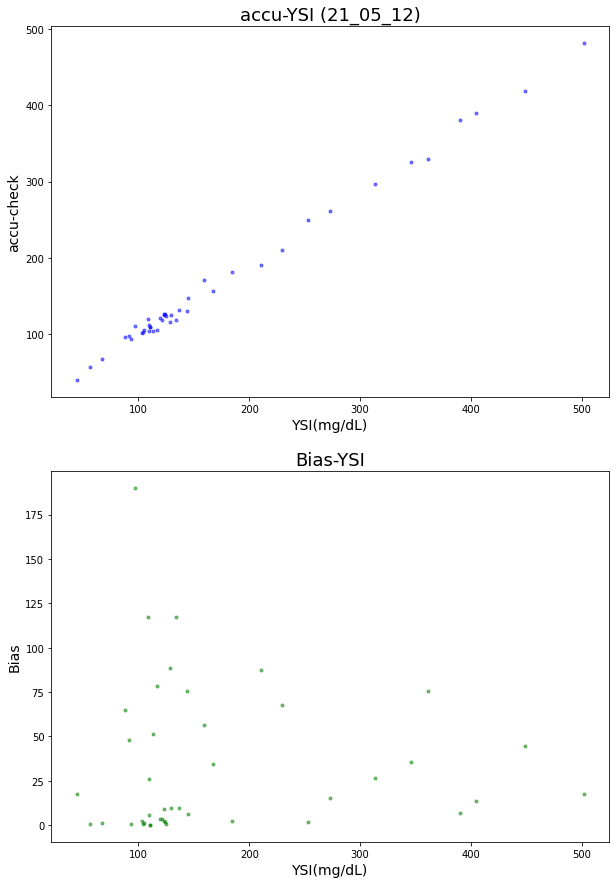

In [125]:
plt.figure(figsize=(10,15))
plt.subplot(2, 1, 1)
plt.plot(x,z,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
plt.title('accu-YSI (21_05_12)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('accu-check', fontsize=14)
plt.subplot(2, 1, 2)
plt.plot(x,y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
plt.title('Bias-YSI', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('Bias', fontsize=14)

#plt.tight_layout()
plt.show()

In [126]:
n = len(x)

X = pd.DataFrame(x) # YSI
Y = pd.DataFrame(y) # Bias
Z = pd.DataFrame(z) # accu-check

In [127]:
from itertools import product 
from itertools import combinations

list_X = np.array(X['YSI_12'].tolist())
list_Y = np.array(Y['Bias_12'].tolist())
list_Z = np.array(Z['AC_12'].tolist())

n = len(X)

yij = list(combinations(list_Y,2))
zij = list(combinations(list_Z,2))

In [128]:
yi = []
yj = []

for i in range(len(yij)):
  a = yij[i]
  yi.append(a[0])
  yj.append(a[1])

In [129]:
zi = []
zj = []

for i in range(len(zij)):
  a = zij[i]
  zi.append(a[0])
  zj.append(a[1])

In [130]:
xij = list(combinations(list_X,2)) 

xi = []
xj = []

for i in range(len(xij)):
  a = xij[i]
  xi.append(a[0])
  xj.append(a[1])

In [131]:
ncomb = len(xi)
ncomb # 점의 개수

903

---

## ■ Passing-Bablok Regresstion
### ○ accu_YSI

In [132]:
# 동일한 쌍 및 기울기가 -1인 경우는 제외하자

N = 0 #위 조건을 제외한 조합의 개수를 계산

# 기울기 Sij(S) = (zi-zj)/(xi-xj)로 계산

Sij = [];

for i in range(ncomb):
  if xi != xj and zi != zj:
    S = (zi[i]-zj[i])/(xi[i]-xj[i])
    Sij.append(S)
    if Sij != -1:
      N+=1


Sij.sort()

# 기울기가 -1보다 작은 직선 개수 카운트

K = 0

for i in range(len(Sij)):
  if Sij[i] < -1:
    K+=1

if N%2 !=0:
  b = Sij[int((N+1)/2+K)]
else:
  b = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])


slope = b

a = []
for i in range(len(X)):
  ex = Z['AC_12'][i] - X['YSI_12'][i]*b
  a.append(ex)

intercept = np.median(a)
intercept
a = intercept
print(intercept," & ",slope)

7.167761503656379  &  0.929889933987179


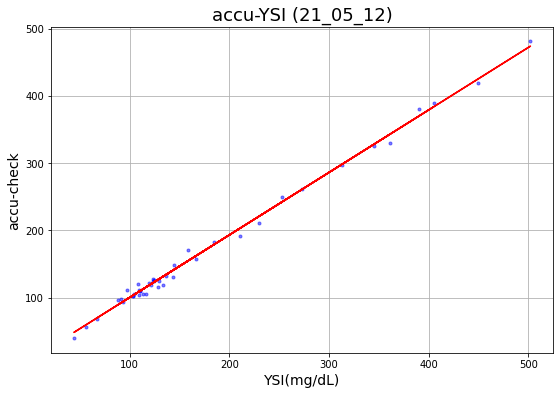

In [133]:
reg_y = []
for i in range(len(X)):
    reg_y.append(a+b*X['YSI_12'][i])


plt.figure(figsize=(9,6))
plt.plot(X,Z,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
plt.plot(X, reg_y, c = 'r', label = 'reg')

plt.title('accu-YSI (21_05_12)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('accu-check', fontsize=14)
plt.grid(True)
plt.show()

## ■ Passing-Bablok Regresstion
### ○ Bias_YSI

In [134]:
# 동일한 쌍 및 기울기가 -1인 경우는 제외하자

N = 0 #위 조건을 제외한 조합의 개수를 계산

# 기울기 Sij(S) = (yi-yj)/(xi-xj)로 계산

Sij = [];

for i in range(ncomb):
  if xi != xj and zi != zj:
    S = (yi[i]-yj[i])/(xi[i]-xj[i])
    Sij.append(S)
    if Sij != -1:
      N+=1


Sij.sort()

# 기울기가 -1보다 작은 직선 개수 카운트

K = 0

for i in range(len(Sij)):
  if Sij[i] < -1:
    K+=1

if N%2 !=0:
  b = Sij[int((N+1)/2+K)]
else:
  b = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])


slope = b

a = []
for i in range(len(X)):
  ex = Y['Bias_12'][i] - X['YSI_12'][i]*b
  a.append(ex)

intercept = np.median(a)
intercept
a = intercept
print(intercept," & ",slope)

-10.086117957562415  &  0.14487879275485635


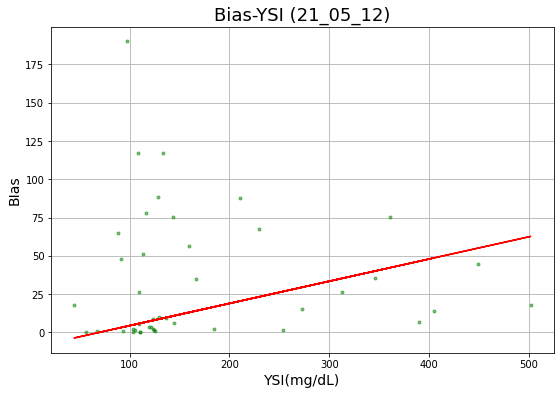

In [135]:
reg_y = []
for i in range(len(X)):
    reg_y.append(a+b*X['YSI_12'][i])


plt.figure(figsize=(9,6))
plt.plot(X,Y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
plt.plot(X, reg_y, c = 'r', label = 'reg')

plt.title('Bias-YSI (21_05_12)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('BIas', fontsize=14)
plt.grid(True)
plt.show()

---

---

# **21년 5월 25일** 

In [136]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [137]:
x = df['YSI_25']
y = df['Bias_25']
z = df['AC_25']

### 분포 확인

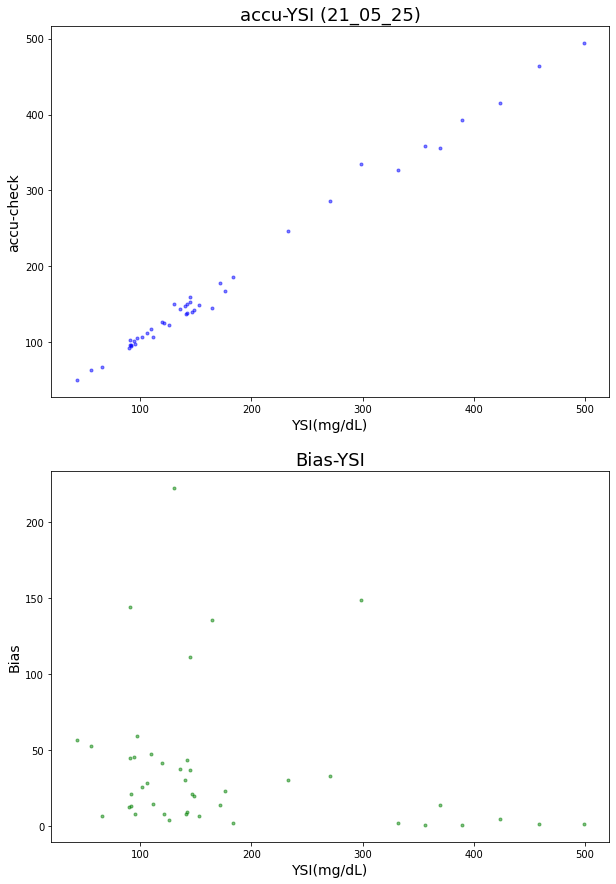

In [138]:
plt.figure(figsize=(10,15))
plt.subplot(2, 1, 1)
plt.plot(x,z,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
plt.title('accu-YSI (21_05_25)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('accu-check', fontsize=14)
plt.subplot(2, 1, 2)
plt.plot(x,y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
plt.title('Bias-YSI', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('Bias', fontsize=14)

#plt.tight_layout()
plt.show()

In [139]:
n = len(x)

X = pd.DataFrame(x) # YSI
Y = pd.DataFrame(y) # Bias
Z = pd.DataFrame(z) # accu-check

from itertools import product 
from itertools import combinations

list_X = np.array(X['YSI_25'].tolist())
list_Y = np.array(Y['Bias_25'].tolist())
list_Z = np.array(Z['AC_25'].tolist())

n = len(X)

yij = list(combinations(list_Y,2))
zij = list(combinations(list_Z,2))


yi = []
yj = []

for i in range(len(yij)):
  a = yij[i]
  yi.append(a[0])
  yj.append(a[1])

zi = []
zj = []

for i in range(len(zij)):
  a = zij[i]
  zi.append(a[0])
  zj.append(a[1])


xij = list(combinations(list_X,2)) 

xi = []
xj = []

for i in range(len(xij)):
  a = xij[i]
  xi.append(a[0])
  xj.append(a[1])


ncomb = len(xi)
ncomb # 점의 개수


903

## ■ Passing-Bablok Regresstion
### ○ accu_YSI

In [140]:
# 동일한 쌍 및 기울기가 -1인 경우는 제외하자

N = 0 #위 조건을 제외한 조합의 개수를 계산

# 기울기 Sij(S) = (zi-zj)/(xi-xj)로 계산

Sij = [];

for i in range(ncomb):
  if xi != xj and zi != zj:
    S = (zi[i]-zj[i])/(xi[i]-xj[i])
    Sij.append(S)
    if Sij != -1:
      N+=1


Sij.sort()

# 기울기가 -1보다 작은 직선 개수 카운트

K = 0

for i in range(len(Sij)):
  if Sij[i] < -1:
    K+=1

if N%2 !=0:
  b = Sij[int((N+1)/2+K)]
else:
  b = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])


slope = b

a = []
for i in range(len(X)):
  ex = Z['AC_25'][i] - X['YSI_25'][i]*b
  a.append(ex)

intercept = np.median(a)
intercept
a = intercept
print(intercept," & ",slope)

6.828945780597962  &  0.9880568236890606


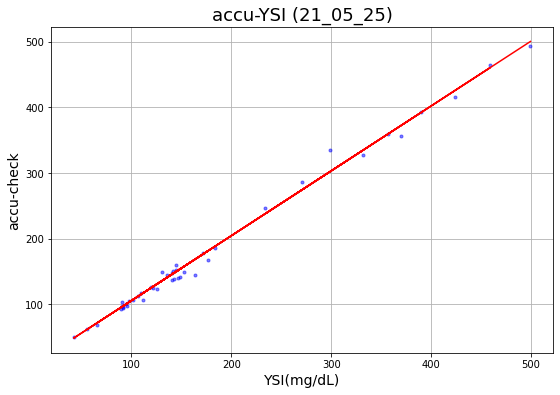

In [141]:
reg_y = []
for i in range(len(X)):
    reg_y.append(a+b*X['YSI_25'][i])


plt.figure(figsize=(9,6))
plt.plot(X,Z,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
plt.plot(X, reg_y, c = 'r', label = 'reg')

plt.title('accu-YSI (21_05_25)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('accu-check', fontsize=14)
plt.grid(True)
plt.show()

## ■ Passing-Bablok Regresstion
### ○ Bias_YSI

In [142]:
# 동일한 쌍 및 기울기가 -1인 경우는 제외하자

N = 0 #위 조건을 제외한 조합의 개수를 계산

# 기울기 Sij(S) = (yi-yj)/(xi-xj)로 계산

Sij = [];

for i in range(ncomb):
  if xi != xj and zi != zj:
    S = (yi[i]-yj[i])/(xi[i]-xj[i])
    Sij.append(S)
    if Sij != -1:
      N+=1


Sij.sort()

# 기울기가 -1보다 작은 직선 개수 카운트

K = 0

for i in range(len(Sij)):
  if Sij[i] < -1:
    K+=1

if N%2 !=0:
  b = Sij[int((N+1)/2+K)]
else:
  b = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])


slope = b

a = []
for i in range(len(X)):
  ex = Y['Bias_25'][i] - X['YSI_25'][i]*b
  a.append(ex)

intercept = np.median(a)
intercept
a = intercept
print(intercept," & ",slope)

21.199789860994194  &  -0.0016711090086297343


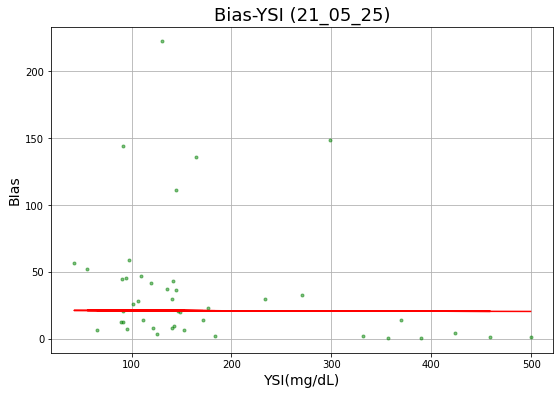

In [143]:
reg_y = []
for i in range(len(X)):
    reg_y.append(a+b*X['YSI_25'][i])


plt.figure(figsize=(9,6))
plt.plot(X,Y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
plt.plot(X, reg_y, c = 'r', label = 'reg')

plt.title('Bias-YSI (21_05_25)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('BIas', fontsize=14)
plt.grid(True)
plt.show()

---

---

# **21년 5월 26일** 

In [166]:
x = df['YSI_26']
y = df['Bias_26']
z = df['AC_26']

In [167]:
x = x.drop(index = [42], axis=0)
y = y.drop(index = [42],axis=0)
z = z.drop(index = [42],axis=0)

### 분포 확인

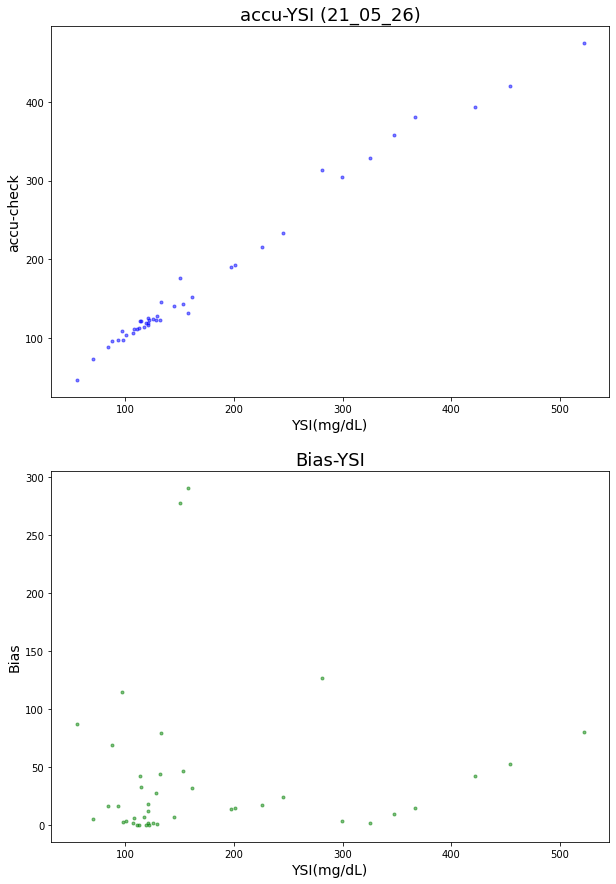

In [168]:
plt.figure(figsize=(10,15))
plt.subplot(2, 1, 1)
plt.plot(x,z,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
plt.title('accu-YSI (21_05_26)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('accu-check', fontsize=14)
plt.subplot(2, 1, 2)
plt.plot(x,y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
plt.title('Bias-YSI', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('Bias', fontsize=14)

#plt.tight_layout()
plt.show()

In [169]:
n = len(x)

X = pd.DataFrame(x) # YSI
Y = pd.DataFrame(y) # Bias
Z = pd.DataFrame(z) # accu-check

from itertools import product 
from itertools import combinations

list_X = np.array(X['YSI_26'].tolist())
list_Y = np.array(Y['Bias_26'].tolist())
list_Z = np.array(Z['AC_26'].tolist())

n = len(X)

yij = list(combinations(list_Y,2))
zij = list(combinations(list_Z,2))


yi = []
yj = []

for i in range(len(yij)):
  a = yij[i]
  yi.append(a[0])
  yj.append(a[1])

zi = []
zj = []

for i in range(len(zij)):
  a = zij[i]
  zi.append(a[0])
  zj.append(a[1])


xij = list(combinations(list_X,2)) 

xi = []
xj = []

for i in range(len(xij)):
  a = xij[i]
  xi.append(a[0])
  xj.append(a[1])


ncomb = len(xi)
ncomb # 점의 개수


861

## ■ Passing-Bablok Regresstion
### ○ accu_YSI

In [171]:
# 동일한 쌍 및 기울기가 -1인 경우는 제외하자

N = 0 #위 조건을 제외한 조합의 개수를 계산

# 기울기 Sij(S) = (zi-zj)/(xi-xj)로 계산

Sij = [];

for i in range(ncomb):
  if xi != xj and zi != zj:
    S = (zi[i]-zj[i])/(xi[i]-xj[i])
    Sij.append(S)
    if Sij != -1:
      N+=1


Sij.sort()

# 기울기가 -1보다 작은 직선 개수 카운트

K = 0

for i in range(len(Sij)):
  if Sij[i] < -1:
    K+=1

if N%2 !=0:
  b = Sij[int((N+1)/2+K)]
else:
  b = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])


slope = b

a = []
for i in range(len(X)):
  ex = Z['AC_26'][i] - X['YSI_26'][i]*b
  a.append(ex)

intercept = np.median(a)
intercept
a = intercept


print(intercept," & ",slope)

8.4548614660945  &  0.9235341264607474


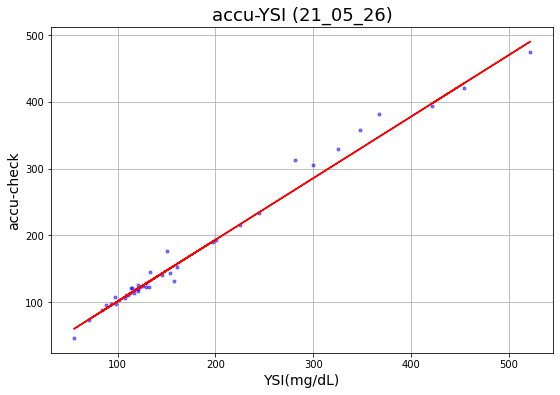

In [172]:
reg_y = []
for i in range(len(X)):
    reg_y.append(a+b*X['YSI_26'][i])


plt.figure(figsize=(9,6))
plt.plot(X,Z,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
plt.plot(X, reg_y, c = 'r', label = 'reg')

plt.title('accu-YSI (21_05_26)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('accu-check', fontsize=14)
plt.grid(True)
plt.show()

## ■ Passing-Bablok Regresstion
### ○ Bias_YSI

In [173]:
# 동일한 쌍 및 기울기가 -1인 경우는 제외하자

N = 0 #위 조건을 제외한 조합의 개수를 계산

# 기울기 Sij(S) = (yi-yj)/(xi-xj)로 계산

Sij = [];

for i in range(ncomb):
  if xi != xj and zi != zj:
    S = (yi[i]-yj[i])/(xi[i]-xj[i])
    Sij.append(S)
    if Sij != -1:
      N+=1


Sij.sort()

# 기울기가 -1보다 작은 직선 개수 카운트

K = 0

for i in range(len(Sij)):
  if Sij[i] < -1:
    K+=1

if N%2 !=0:
  b = Sij[int((N+1)/2+K)]
else:
  b = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])


slope = b

a = []
for i in range(len(X)):
  ex = Y['Bias_26'][i] - X['YSI_26'][i]*b
  a.append(ex)

intercept = np.median(a)
intercept
a = intercept
print(intercept," & ",slope)

-13.067235085377098  &  0.1657926135314001


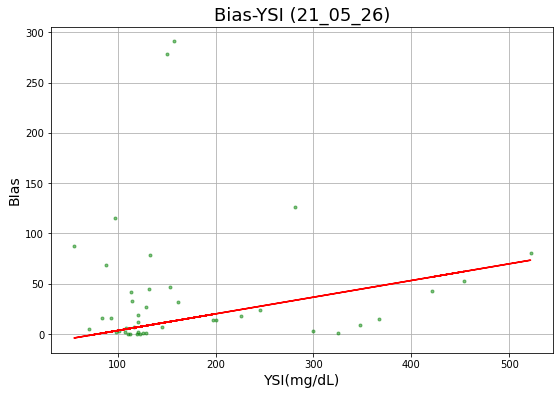

In [174]:
reg_y = []
for i in range(len(X)):
    reg_y.append(a+b*X['YSI_26'][i])


plt.figure(figsize=(9,6))
plt.plot(X,Y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
plt.plot(X, reg_y, c = 'r', label = 'reg')

plt.title('Bias-YSI (21_05_26)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('BIas', fontsize=14)
plt.grid(True)
plt.show()

---

---

# **21년 5월 28일** 

In [175]:
x = df['YSI_28']
y = df['Bias_28']
z = df['AC_28']

### 분포 확인

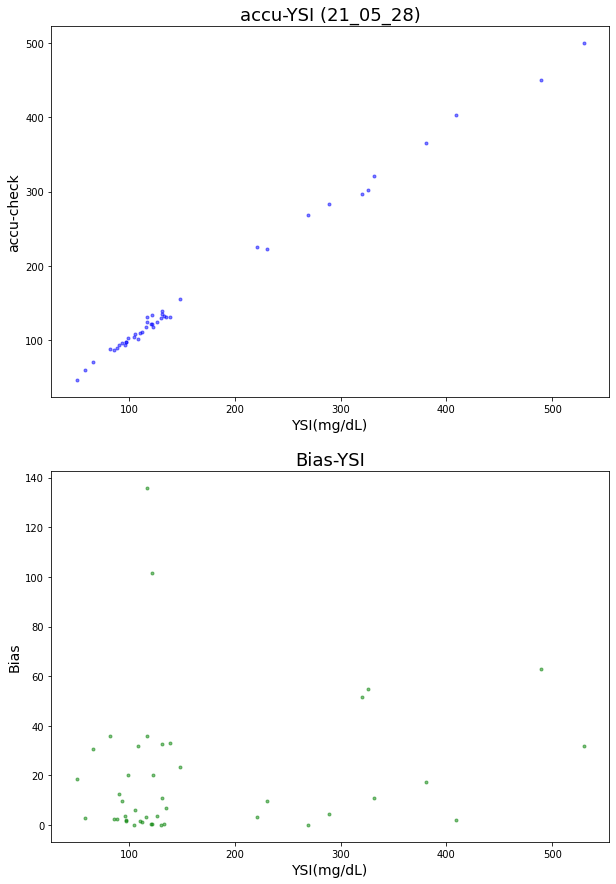

In [176]:
plt.figure(figsize=(10,15))
plt.subplot(2, 1, 1)
plt.plot(x,z,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
plt.title('accu-YSI (21_05_28)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('accu-check', fontsize=14)
plt.subplot(2, 1, 2)
plt.plot(x,y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
plt.title('Bias-YSI', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('Bias', fontsize=14)

#plt.tight_layout()
plt.show()

In [178]:
n = len(x)

X = pd.DataFrame(x) # YSI
Y = pd.DataFrame(y) # Bias
Z = pd.DataFrame(z) # accu-check

from itertools import product 
from itertools import combinations

list_X = np.array(X['YSI_28'].tolist())
list_Y = np.array(Y['Bias_28'].tolist())
list_Z = np.array(Z['AC_28'].tolist())

n = len(X)

yij = list(combinations(list_Y,2))
zij = list(combinations(list_Z,2))


yi = []
yj = []

for i in range(len(yij)):
  a = yij[i]
  yi.append(a[0])
  yj.append(a[1])

zi = []
zj = []

for i in range(len(zij)):
  a = zij[i]
  zi.append(a[0])
  zj.append(a[1])


xij = list(combinations(list_X,2)) 

xi = []
xj = []

for i in range(len(xij)):
  a = xij[i]
  xi.append(a[0])
  xj.append(a[1])


ncomb = len(xi)
ncomb # 점의 개수


903

## ■ Passing-Bablok Regresstion
### ○ accu_YSI

In [179]:
# 동일한 쌍 및 기울기가 -1인 경우는 제외하자

N = 0 #위 조건을 제외한 조합의 개수를 계산

# 기울기 Sij(S) = (zi-zj)/(xi-xj)로 계산

Sij = [];

for i in range(ncomb):
  if xi != xj and zi != zj:
    S = (zi[i]-zj[i])/(xi[i]-xj[i])
    Sij.append(S)
    if Sij != -1:
      N+=1


Sij.sort()

# 기울기가 -1보다 작은 직선 개수 카운트

K = 0

for i in range(len(Sij)):
  if Sij[i] < -1:
    K+=1

if N%2 !=0:
  b = Sij[int((N+1)/2+K)]
else:
  b = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])


slope = b

a = []
for i in range(len(X)):
  ex = Z['AC_28'][i] - X['YSI_28'][i]*b
  a.append(ex)

intercept = np.median(a)
intercept
a = intercept


print(intercept," & ",slope)

6.6792366207561145  &  0.9451038737332941


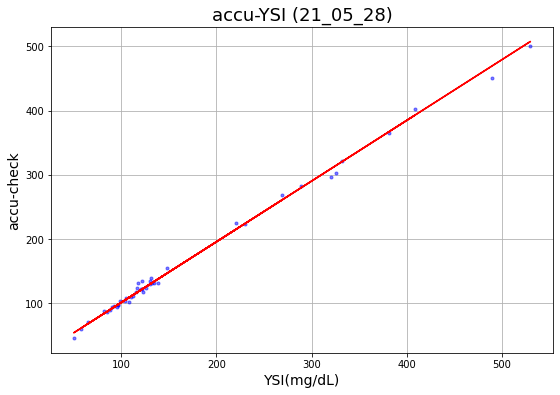

In [180]:
reg_y = []
for i in range(len(X)):
    reg_y.append(a+b*X['YSI_28'][i])


plt.figure(figsize=(9,6))
plt.plot(X,Z,linestyle='none', marker='o',markersize=3,color='blue', alpha=0.5)
plt.plot(X, reg_y, c = 'r', label = 'reg')

plt.title('accu-YSI (21_05_28)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('accu-check', fontsize=14)
plt.grid(True)
plt.show()

## ■ Passing-Bablok Regresstion
### ○ Bias_YSI

In [181]:
# 동일한 쌍 및 기울기가 -1인 경우는 제외하자

N = 0 #위 조건을 제외한 조합의 개수를 계산

# 기울기 Sij(S) = (yi-yj)/(xi-xj)로 계산

Sij = [];

for i in range(ncomb):
  if xi != xj and zi != zj:
    S = (yi[i]-yj[i])/(xi[i]-xj[i])
    Sij.append(S)
    if Sij != -1:
      N+=1


Sij.sort()

# 기울기가 -1보다 작은 직선 개수 카운트

K = 0

for i in range(len(Sij)):
  if Sij[i] < -1:
    K+=1

if N%2 !=0:
  b = Sij[int((N+1)/2+K)]
else:
  b = 0.5* (Sij[(N/2)+K] + Sij[(N/2)+K+1])


slope = b

a = []
for i in range(len(X)):
  ex = Y['Bias_28'][i] - X['YSI_28'][i]*b
  a.append(ex)

intercept = np.median(a)
intercept
a = intercept
print(intercept," & ",slope)

-1.3934440571379083  &  0.06248696675655821


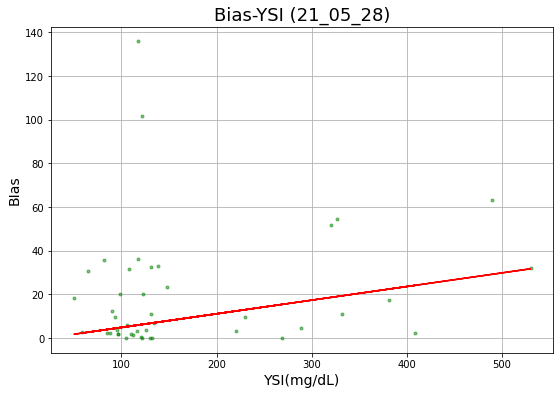

In [182]:
reg_y = []
for i in range(len(X)):
    reg_y.append(a+b*X['YSI_28'][i])


plt.figure(figsize=(9,6))
plt.plot(X,Y,linestyle='none', marker='o',markersize=3,color='green', alpha=0.5)
plt.plot(X, reg_y, c = 'r', label = 'reg')

plt.title('Bias-YSI (21_05_28)', fontsize=18)
plt.xlabel('YSI(mg/dL)', fontsize=14)
plt.ylabel('BIas', fontsize=14)
plt.grid(True)
plt.show()